# ENEM - Regressão

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

np.random.seed(42)

### Carregando os dados

In [2]:
df = pd.read_csv('../data/microdados_enem_2020.csv', nrows=10000, encoding='ISO-8859-1', delimiter=';')

In [3]:
# Separando os dados em teste e treino
p_train = 0.7
p_test = 1 - p_train

indices = np.random.randint(0, 10000, 10000)
df = df.iloc[indices, :]

train_df = df.iloc[:int(10000*p_train), :]
test_df = df.iloc[int(10000*p_test):, :]

In [4]:
# Selecionando algumas features de acordo com a correlação
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

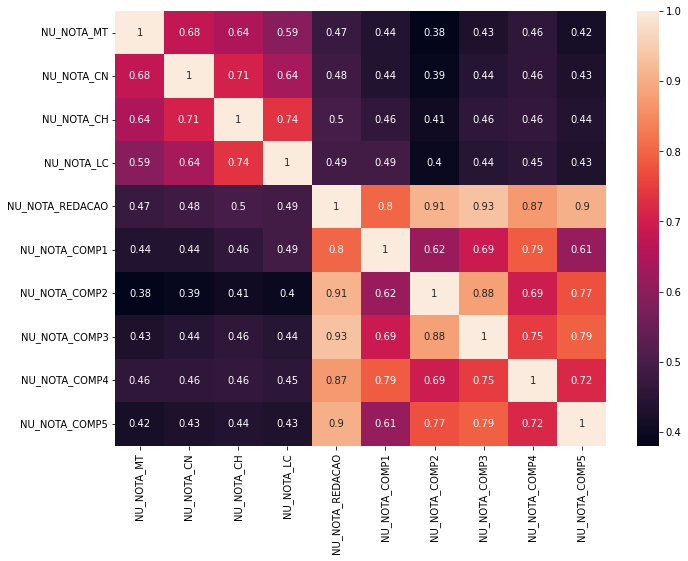

In [5]:
# Verificando a correlação do conjunto de treino
corr = train_df[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10});

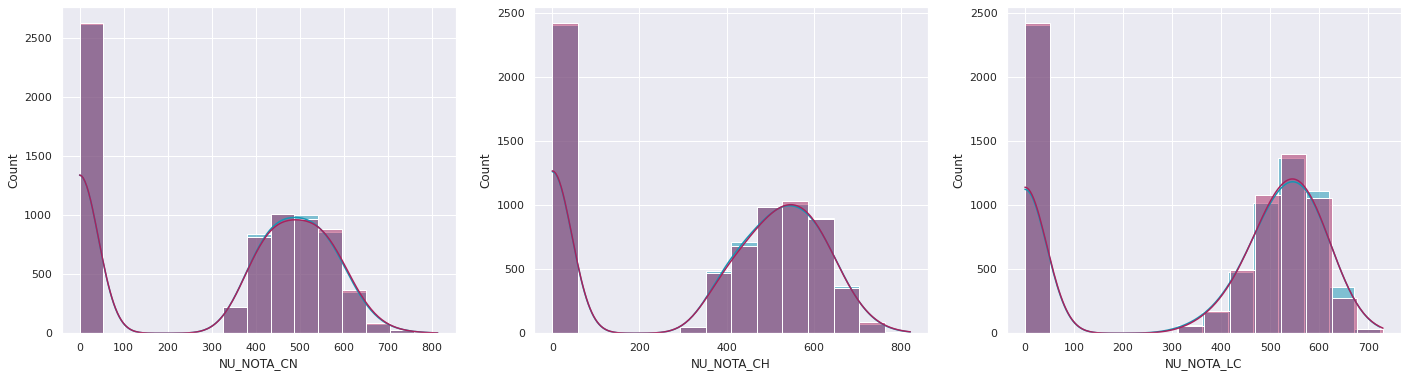

In [6]:
# Verificando os histogramas das features escolhidas
sns.set_theme()
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
sns.histplot(data=train_df['NU_NOTA_CN'].fillna(0), ax=ax[0], kde=True, color="#1596b3");
sns.histplot(data=test_df['NU_NOTA_CN'].fillna(0), ax=ax[0], kde=True, color="#a8225e");

sns.histplot(data=train_df['NU_NOTA_CH'].fillna(0), ax=ax[1], kde=True, color="#1596b3");
sns.histplot(data=test_df['NU_NOTA_CH'].fillna(0), ax=ax[1], kde=True, color="#a8225e");

sns.histplot(data=train_df['NU_NOTA_LC'].fillna(0), ax=ax[2], kde=True, color="#1596b3");
sns.histplot(data=test_df['NU_NOTA_LC'].fillna(0), ax=ax[2], kde=True, color="#a8225e");

In [8]:
# Limpando o conjunto de treinamento
train_df = train_df[
      (train_df['NU_NOTA_CN'].notnull())  & (train_df['NU_NOTA_CN'] != 0) & (train_df['NU_NOTA_CH'].notnull())      & (train_df['NU_NOTA_CH'] != 0) 
    & (train_df['NU_NOTA_LC'].notnull())  & (train_df['NU_NOTA_LC'] != 0) & (train_df['NU_NOTA_REDACAO'].notnull()) & (train_df['NU_NOTA_REDACAO'] != 0)    
]

In [9]:
# Limpando o conjunto de teste
test_df = test_df[
      (test_df['NU_NOTA_CN'].notnull())  & (test_df['NU_NOTA_CN'] != 0) & (test_df['NU_NOTA_CH'].notnull())      & (test_df['NU_NOTA_CH'] != 0) 
    & (test_df['NU_NOTA_LC'].notnull())  & (test_df['NU_NOTA_LC'] != 0) & (test_df['NU_NOTA_REDACAO'].notnull()) & (test_df['NU_NOTA_REDACAO'] != 0)    
]

In [10]:
# Verificando se realmente foi removido todos valores null
test_df[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

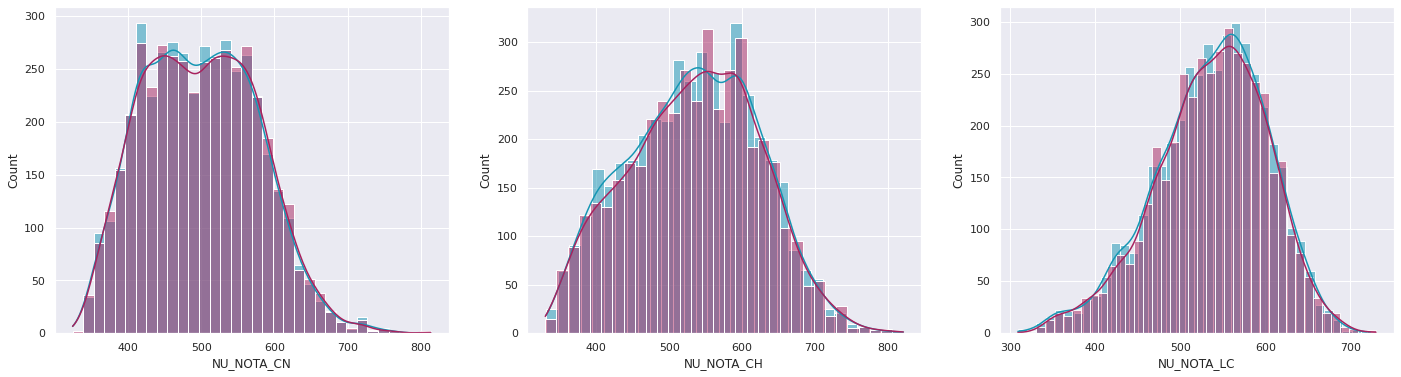

In [11]:
# Histograma após remoção dos valores null
sns.set_theme()
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
sns.histplot(data=train_df['NU_NOTA_CN'], ax=ax[0], kde=True, color="#1596b3");
sns.histplot(data=test_df['NU_NOTA_CN'], ax=ax[0], kde=True, color="#a8225e");

sns.histplot(data=train_df['NU_NOTA_CH'], ax=ax[1], kde=True, color="#1596b3");
sns.histplot(data=test_df['NU_NOTA_CH'], ax=ax[1], kde=True, color="#a8225e");

sns.histplot(data=train_df['NU_NOTA_LC'], ax=ax[2], kde=True, color="#1596b3");
sns.histplot(data=test_df['NU_NOTA_LC'], ax=ax[2], kde=True, color="#a8225e");

## Regressor

In [12]:
# Faz-se o replace de todos valores null por 0
test_df['NU_NOTA_COMP1'].fillna(0,inplace=True)
test_df['NU_NOTA_COMP2'].fillna(0,inplace=True)
test_df['NU_NOTA_COMP3'].fillna(0,inplace=True)
test_df['NU_NOTA_COMP4'].fillna(0,inplace=True)
test_df['NU_NOTA_COMP5'].fillna(0,inplace=True)
train_df['NU_NOTA_COMP1'].fillna(0,inplace=True)
train_df['NU_NOTA_COMP2'].fillna(0,inplace=True)
train_df['NU_NOTA_COMP3'].fillna(0,inplace=True)
train_df['NU_NOTA_COMP4'].fillna(0,inplace=True)
train_df['NU_NOTA_COMP5'].fillna(0,inplace=True)

In [13]:
# Escolhe-se as notas de matemática
y_train = train_df['NU_NOTA_MT']
x_train = train_df[features]
x_test = test_df[features]
y_test = test_df['NU_NOTA_MT']

# Padronizando os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# Treina-se um modelo RandomForest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='absolute_error', 
           max_depth=8,
           max_leaf_nodes=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [22]:

regressor.fit(x_train, y_train);

In [17]:
# Prediz as notas do conjunto de teste
y_pred_test = regressor.predict(x_test)

In [18]:
# Verifica-se as métricas de dispersão
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(8))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(8))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(8))

MAE: 50.29185948
MSE: 4147.59575193
RMSE: 64.40183035


In [19]:
# Valores Reais x Preditos
results = pd.DataFrame([y_test.values, y_pred_test]).transpose()
results.columns = columns=['true', 'pred']

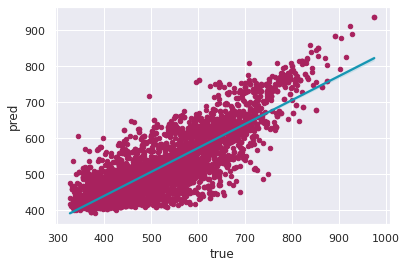

In [20]:
ax = sns.regplot(x=y_test, y=y_pred_test, scatter=False, color='#1596b3')
results.plot.scatter(x='true', y='pred', c='#a8225e', ax=ax);